**Entrada:** Grafo dirigido sin ciclos $G=(V,E)$. Siendo V la cantidad de nodos y E la cantidad de arcos.

**Salida:** Un orden topológico de los vértices de $G$. Es decir, una asignación $f(v)$ a cada vértice $v\in V$, tal que para cada arco $(v,w)\in E$, se cumple que $f(v)<f(w)$

# 1. Descripción del problema

En una situación hipotetica en el que tengamos una cierta cantidad de tareas y cada una de ellas tenga restricciones de precedencia, nos interesa encontrar su orden de desarrollo de tal manera que se cumplan todos los prerrequisitos. Para poder resolver este problema se hace uso del ordenamiento topológico.


# 2. Descripción del algoritmo

El siguiente algoritmo busca implementar un grafo dirigido sin ciclos (**DAG**). Esto debido a que los grafos con ciclos no tienen un orden topológico factible, debido a que los ciclos bloquean que los nodos puedan cumplir con las restricciones de precedencia.

Una forma de encontrar cualquier **DAG** es avanzar a través de las tareas predecesoras ya que de esta manera llegaremos a un numero finito de fuentes. Completamos las tareas fuentes y luego las eliminados del grafo junto con su arcos. De esta manera se puede obtener el orden topológico de cualquier **DAG**

Ejemplo de DAG:

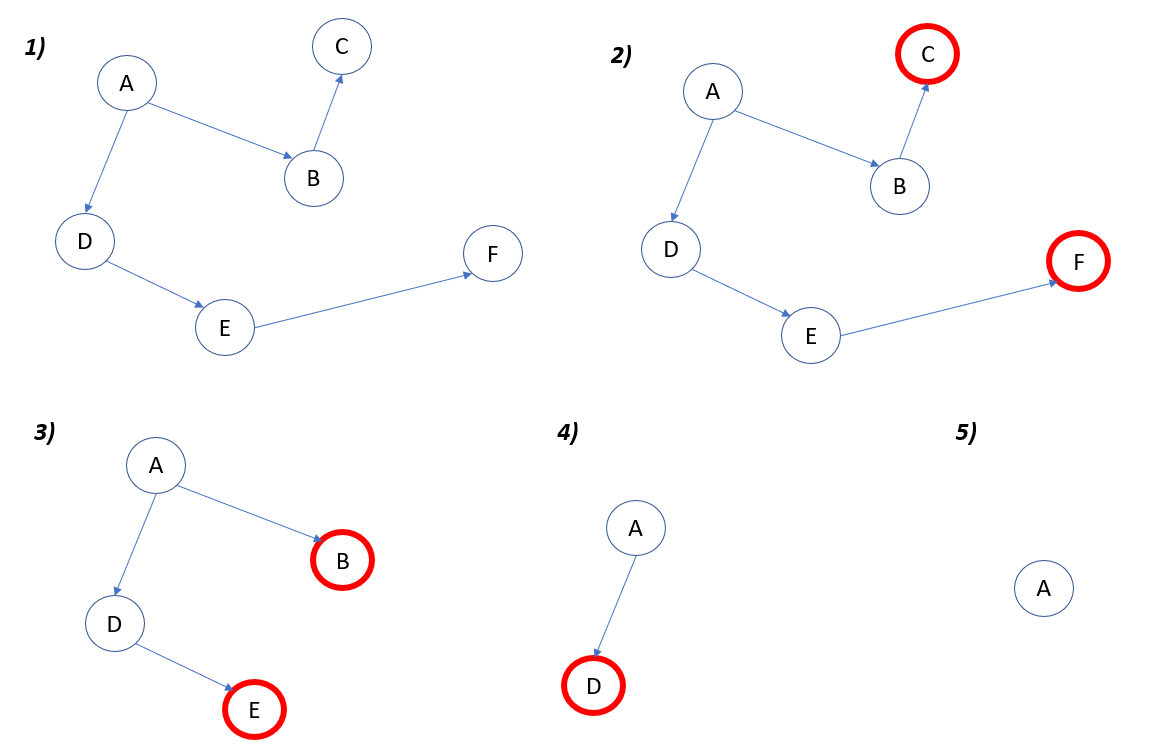

También es posible obtener el orden topológico mediante una serie de búsquedas en profundidad (DFS) en post-orden, es decir, se recorren primero los nodos hijos y por último la raíz, o dicho también los nodos son visitados antes de sus ancetros.

A continuación se mostraran dos formas de implementar el algoritmo, una es utilzando DFS iterativo y otro DFS recursivo.

**DFS Iterativo:** Cada vez que se procesa un nodo se coloca en una pila, de manera que nos permita guardar el resultado final. Cada nodo se procesa después de que se hayan procesado sus nodos hijos. Además se utiliza un arreglo o lista que nos permite almancenar los valores del orden topológico encontrado.

Le agregamos etiquetas a cada uno de los nodos para saber si fue descubierto, no descubierto o visitado. Entonces en un ciclo while aplicamos DFS en post-orden por cada nodo del grafo. En la primera pasada vamos descubriendo los valores adyacentes de los nodos. En la segunda pasada se visitan todos los nodos del grafo. Cada vez que marcamos un nodo como visitado, lo agregamos a nuestro arreglo o lista. Cuando hayamos recorrido todos los nodos, procederemos a invertir el arreglo ya que los valores nos quedaran al revés. Con todo ello obtendremos nuestro orden topológico.

**DFS Recursivo:** Es parecido a la variante anterior, se etiquetan los nodos y se crea un arreglo o lista auxiliar para guardar los valores del orden topológico. Luego de manera recursiva se van marcando los nodos como "visitados", una vez marcados se agregan a nuestro arreglo/lista. Una vez procesados todos los nodos se invierte el arreglo/lista.


DFS post-orden:


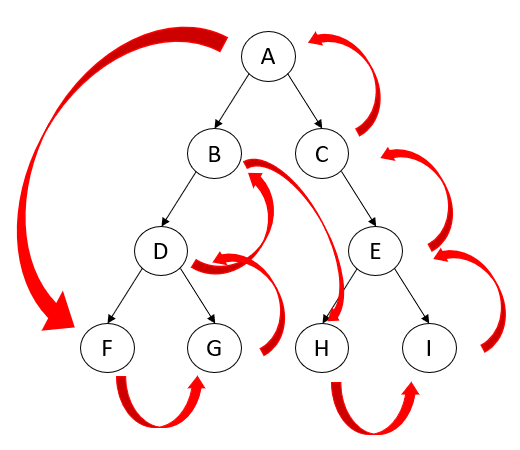


**Ejemplo:**

Dado el siguiente grafo, determinemos su orden topológico.

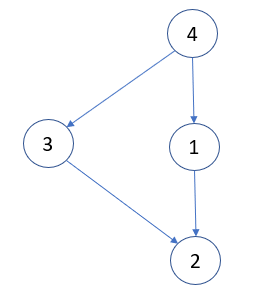

* Primero agregamos etiquetas a los nodos y inicializamos una pila con los sus valores.

* Tomamos el ultimo valor 2 sacandolo de la pila, lo marcamos como descubierto y como no tiene valores adjuntos se continua. Se saca nuevamente pero como ahora posee la etiqueta de descubierto se marca como visitado y se agrega a un arreglo.

* Seguimos con el 3, lo sacamos de la pila, lo marcamos como descubierto y lo volvemos a agregar a la pila. Como no posee adjuntas no descubiertas se continua. Se saca nuevamente el 3 y como ahora esta descubierto se marca como visitado y se agrega al arreglo.

* Tomamos el 1, lo marcamos como descubierto y lo volvemos a agregar a la pila. Como no tiene valores adjuntos no descubiertos se sigue. Se toma nuevamente el 1 y como esta descubierto se agrega al arreglo.

* Finalmente tomamos el 4 y lo marcamos como descubierto y se vuelve a agregar. Como no posee valos adjuntos no descubiertos se continua. Se vuelve a sacar y como esta descubierto se marca como visitado y se agrega al arreglo.

Nos queda un arreglo de la forma $[2,3,1,4]$
Lo invertimos y nos da el orden toppológico de $[4,1,3,2]$


# 3. Código

## 3.1 Generar grafo

In [550]:
from collections import defaultdict
from networkx.drawing.nx_pydot import graphviz_layout
import networkx as nx
import math
import random

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(1, V+1), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph

# Recibe un grafo de tipo [defaultdict(list)]
# Retorna un nx.DiGraph de la libreria networkx
def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()
  for i in graph.keys():
    nxdigraph.add_node(i)
    for v in graph[i]:
      nxdigraph.add_edge(i, v)
  return nxdigraph

def mostrar(T):
  # Guardamos en un diccionario (labels) las etiquetas de cada nodo
  labels={}
  for n in T:
    if "label" in T.nodes[n]: labels[n]=T.nodes[n]["label"]
  # Cambiamos la etiqueta de los nodos
  T_labeled = nx.relabel_nodes(T, labels, copy=True)

  # calcula las posiciones de los nodos
  pos = graphviz_layout(T_labeled, prog="dot")

  # Dibujamos los nodos con sus nuevas etiquetas (etiquetas representan postorden)
  nx.draw(T_labeled, pos, with_labels=True, node_size=800, font_color="black", font_size=13, width =1.0)
  nodes = nx.draw_networkx_nodes(T_labeled, pos,  node_size=800, node_color="white")
  nodes.set_edgecolor('black')

# Cantidad de nodos
V = 4

T = graph_instance_creator(V)
G = graph_to_nxdigraph(T)
#mostrar(G)



## 3.2 Orden Topológico utilizando DFS iterativo

In [657]:
from termcolor import colored, cprint
# Este algoritmo realiza un DFS iterativo y
# etiqueta los nodos en postorden
def TopologicalSorting_iterativo(T,initial,verbose,visualize): 

  #Mostrar grafo a trabajar
  if visualize == True:
    mostrar(T)

  #Diccionario
  state = dict()

  #Pila
  Q=[]

  #Orden Topológico
  B=[]

  #Inicializar etiquetas a los nodos
  for n in T: 
    state[n]= "no descubierto"
    Q.append(n)

  if verbose == True:
    print("Agregar etiquetas a los nodos:",state)
    print("inicializar pila:",Q,"\n")

  while len(Q)>0:
    n = Q.pop()
    if verbose == True:
      cprint(f"Eliminado valor {n} de la pila",'red',attrs=['bold'])

    #Se descubren los nodos adyacentes
    if state[n]=="no descubierto":
      if verbose == True:
        cprint(f"Marcar nodo {n} como descubierto",'yellow',attrs=['bold'])
      state[n]="descubierto"
      if verbose == True:
        cprint(f"Agregar {n} a la pila",'blue',attrs=['bold'])
      Q.append(n)
      if verbose == True:
        print(Q,"\n")
      if verbose == True:
        cprint(f"[Buscar adjuntas No descubiertas...]")

      for adj in reversed(list(T[n])):
        if state[adj]== "no descubierto":
          if verbose == True: 
            cprint(f"({adj}) No descubierto",'magenta',attrs=['bold'])
            cprint(f"Agregar adjunta ({adj}) a la pila\n",'magenta',attrs=['bold'])
          Q.append(adj)
          if verbose == True: 
            print(Q,"\n")

    #Se visitan los nodos del grafo
    elif state[n]=="descubierto" and state[n] != "visitado":
      if verbose == True:
        cprint(f"Marcar {n} como visitado",'green',attrs=['bold'])
      state[n] ="visitado"
      if verbose == True:
        cprint(f"Agregar {n} en la lista:",'green',attrs=['bold'])
      B.append(n)
      if verbose == True:
        cprint(B,"cyan",attrs=['bold'])
        print()

  if verbose == True:
    print("[Invertir lista]\n")
  B.reverse()
  return B

#Realizamos la búsqueda
topological = TopologicalSorting_iterativo(G,0,verbose = False,visualize = False)
print("Orden topológico:",topological)



Orden topológico: [4, 1, 3, 2]


## 3.2.1 Verbose == `True`

In [658]:
topological = TopologicalSorting_iterativo(G,0,verbose = True,visualize = False)
print("Orden topológico:",topological)

Agregar etiquetas a los nodos: {4: 'no descubierto', 1: 'no descubierto', 3: 'no descubierto', 2: 'no descubierto'}
inicializar pila: [4, 1, 3, 2] 

Eliminado valor 2 de la pila
Marcar nodo 2 como descubierto
Agregar 2 a la pila
[4, 1, 3, 2] 

[Buscar adjuntas No descubiertas...]
Eliminado valor 2 de la pila
Marcar 2 como visitado
Agregar 2 en la lista:
[2]

Eliminado valor 3 de la pila
Marcar nodo 3 como descubierto
Agregar 3 a la pila
[4, 1, 3] 

[Buscar adjuntas No descubiertas...]
Eliminado valor 3 de la pila
Marcar 3 como visitado
Agregar 3 en la lista:
[2, 3]

Eliminado valor 1 de la pila
Marcar nodo 1 como descubierto
Agregar 1 a la pila
[4, 1] 

[Buscar adjuntas No descubiertas...]
Eliminado valor 1 de la pila
Marcar 1 como visitado
Agregar 1 en la lista:
[2, 3, 1]

Eliminado valor 4 de la pila
Marcar nodo 4 como descubierto
Agregar 4 a la pila
[4] 

[Buscar adjuntas No descubiertas...]
Eliminado valor 4 de la pila
Marcar 4 como visitado
Agregar 4 en la lista:
[2, 3, 1, 4]

[In

## 3.2.2 visualize == `True`

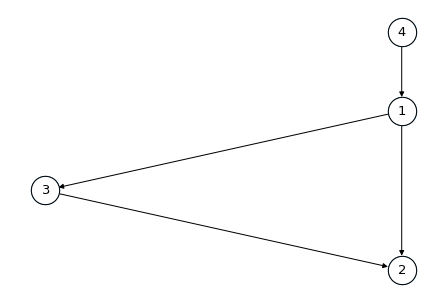

In [553]:
topological = TopologicalSorting_iterativo(G,0,verbose = False,visualize = True)

## 3.3 Orden Topológico utilizando DFS Recursivo

In [647]:
def topologicalSorting(G,n,visitado,l,verbose):
  #Etiquetar como visitado
  visitado[n] = True
  if verbose == True:
    cprint(f"Marcar {n} como True",'yellow',attrs=['bold'])
  for i in G[n]:
    if visitado[i] == False:
      if verbose == True:
        cprint(f"TopologicalSorting!",'red',attrs=['bold'])
      topologicalSorting(G,i,visitado,l,verbose)
  #Agregar al arreglo
  if verbose == True:
    cprint(f"Agregar {n} al arreglo",'green',attrs=['bold'])
  l.append(n)
  if verbose == True:
    print(l)

def TopologicalSorting_recursivo(G,verbose,visualize):

  if visualize == True:
    mostrar(G)

  #Etiquetar nodos
  visitado = [False]*(len(G)*2) # se multiplica por dos para evitar errores posteriores con la experimentación
  if verbose == True:
    cprint(f"Etiquetas: {visitado}",'cyan',attrs=['bold'])
  #Crear arreglo
  aux = []
  if verbose == True:
    print("[Crear arreglo]")
  for n in G:
    if visitado[n] == False:
      if verbose == True:
        cprint(f"topologicalSorting_recursivo!",'blue',attrs=['bold'])
      topologicalSorting(G,n,visitado,aux,verbose)
  #Invertir arreglo
  if verbose == True:
    print("\n[Invertir arreglo]\n")
  aux.reverse()
  return aux

ordenTop = TopologicalSorting_recursivo(G,verbose = False,visualize = False)
print("Orden Topológico:",ordenTop)

Orden Topológico: [4, 1, 3, 2]


## 3.3.1 verbose == `True`

In [648]:
ordenTop = TopologicalSorting_recursivo(G,verbose = True,visualize = False)
print("Orden Topológico:",ordenTop)

Etiquetas: [False, False, False, False, False, False, False, False]
[Crear arreglo]
topologicalSorting_recursivo!
Marcar 4 como True
TopologicalSorting!
Marcar 1 como True
TopologicalSorting!
Marcar 3 como True
TopologicalSorting!
Marcar 2 como True
Agregar 2 al arreglo
[2]
Agregar 3 al arreglo
[2, 3]
Agregar 1 al arreglo
[2, 3, 1]
Agregar 4 al arreglo
[2, 3, 1, 4]

[Invertir arreglo]

Orden Topológico: [4, 1, 3, 2]


## 3.3.2 visualize == `True`

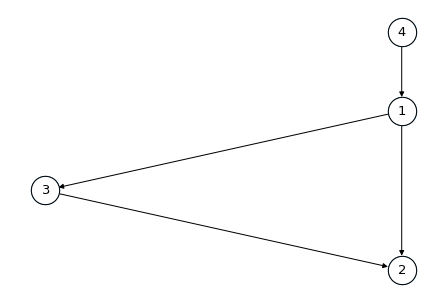

In [649]:
ordenTop = TopologicalSorting_recursivo(G,verbose = False,visualize = True)

# 4. Correctitud

Para demostrar que el algoritmo es correcto debemos tener en cuenta la siguiente restricción: “Para encontrar el orden topológico de un grafo dirigido, este debe ser acíclico” o mejor dicho, que no posea ciclos.
¿Como podemos demostrar que un grafo dirigido es acíclico? Primero vamos a plantear una hipótesis.

**Hipótesis:**  *Si un grafo es dirigido y acíclico entonces debería existir un orden topológico.*

Se intentará validar dicha hipótesis mediante el siguiente teorema.

**Teorema:** *Cualquier grafo dirigido sin ciclos tiene al menos un orden topológico.*

Para demostrar dicho teorema se deben considerar el siguiente lema.

**Lema 1:** *Todo DAG (Grafo acíclico dirigido) tiene un origen.*

El lema 1 se puede demostrar al escoger un vértice arbitrario de un grafo acíclico dirigido y recorrerlo hacia el origen. Si es acíclico llegaremos a un vértice origen.

El teorema se demuestra pensando en la idea de crear un orden topológico de izquierda a derecha tomando un vértice origen.

**Prueba del teorema:**

Sea un grafo G acíclico dirigido con ‘n’ vértices. Se debe asignar valores $f$ a los vértices de forma creciente de 1 hasta $n$. Al dejar un vértice $‘v_1’ $ como vértice origen, nos aseguramos que el ordenamiento no se realizara en otro sentido, por ende, es obligatorio escoger un vértice origen para asignar valor a $f$.

Gracias al lema 1, nos asegura la existencia de G, entonces a su vértice $‘v_1’ $ se le asigna el valor f(v_1) = 1. Si ocupamos recursividad, podemos generar un grafo $G_0$ al eliminar el vértice $‘v_1’$, dando que los vértices que se pueden marcar partiendo de 2 hasta n y como G es acíclico dirigido, condena a que G0 también lo sea, puesto que eliminar cosas no crea ciclos nuevos entonces queda comprobado que $G_0$ es acíclico dirigido. Al ir reduciendo el grafo por recursión se puede crear el orden topológico eliminando vértices.

Ahora que demostramos que todo grafo dirigido acíclico posee orden topológico se debe demostrar que el algoritmo encuentra dicho orden, con ello se debe preguntar: ¿Es posible encontrar un orden topológico para un grafo dirigido acíclico mediante un algoritmo?, a dicha pregunta se da la siguiente hipótesis.

**Hipótesis:** *Existe un algoritmo que permite encontrar el orden topológico de un grafo dirigido acíclico.*

Para esto se determina el siguiente teorema.

**Teorema:** El algoritmo para encontrar un orden topológico de un grafo dirigido acíclico retorna una secuencia de los elementos con cierto orden.

Mediante inducción probaremos que el algoritmo es correcto.

Sea $P(1)$ el caso base donde el grafo posee un único elemento, se puede considerar su orden topológico como el mismo elemento sin otra opción posible, en caso de tener un grafo con dos nodos y un arco se podría considerar también como un caso base el nodo origen y luego el siguiente nodo.
Dado que el algoritmo se implementa mediante BFS en Post-orden, tenemos un recorrido de final a inicio, esto debemos tenerlo en consideración para explicar el siguiente paso.

Para $P(m)$ casos con m < n, se puede considerar que el algoritmo asignará un favor $f$ a un nodo $’v’$ desde $m$ hasta 1, por ende, se tendrá un orden de recorrido para el grafo $G_0$, a medida que se va visitando y asignando valores al grafo, el algoritmo va guardando el orden topológico encontrado desde el ultimo nodo que iría en dicho orden hasta el nodo m, por lo tanto, obtenemos un orden que va de fin a inicio mientras se visitan los nodos.

Como el grafo $G_0$ es dirigido y acíclico completará su recorrido a los $n$ nodos, dando que se encontrará un orden topológico para el grafo $G$, por lo que se demuestra que el algoritmo es correcto.


# 5. Tiempo de ejecución

Para encontrar el tiempo de ejecución del orden topológico, se realizará un análisis específico a cada paso que realiza el algoritmo:

---
###Paso 1: Creación de listas.

Este paso sólo crea estructuras auxiliares que se utilizarán la función en los siguientes procedimientos. Por lo tanto, este paso tiene complejidad temporal $O(1)$.

---
###Paso 2: Ciclo de DFS.

####Paso 2.1: DFS.
Se realiza una búsqueda en profundidad en el grafo. El DFS debe recorrer una cierta cantidad de nodos $m$, cumpliéndose que $m < V$, con $V$ = cantidad de nodos en el grafo. Durante el recorrido, se debe agregar a la lista auxiliar creada los nodos que son visitados.

Al trabajar con un "sub-grafo" el DFS que tarda en promedio a nivel general $O(|V|+|E_v|)$, tendrá una complejidad de $O(|m| + |e_m|)$. 

####Paso 2.2: Traspasar datos de lista.
Después de recorrer el grafo, se deben agregar los nodos de la lista auxiliar a la lista de orden topológico. Esta acción se realiza gracias a un ciclo for, por lo que hará $m$ pasos.

####Paso 2.3: Definir un nuevo nodo inicial.
En caso de que aún queden nodos en el grafo, resultará necesaria otra iteración. Por ende, se debe elegir un nuevo valor inicial para iterar en el grafo. Sin embargo, este paso se puede realizar de varias formas simples, y no debería tomar más que $O(1)$.

####Conclusión del Paso 2.
Si bien, al juntar todos los pasos queda una complejidad de $O(m)$, se debe considerar al momento del análisis que el ciclo while que opera a todas las instrucciones anteriores se ejecutará hasta que el DFS y la lista hayan procesado a todos los elementos. Por lo tanto, la complejidad temporal puede reducirse a operar las instrucciones en los $V$ nodos del grafo, o sea, complejidad $O(|V|+|E_v|)$.

---
###Paso 3: Invertir el orden de la lista oficial.
El DFS agrega los nodos desde el último visitado, hasta el nodo de origen del camino seleccionado en la iteración, por ende, al momento de agregar estos a la lista auxiliar, estos quedarán en el orden inverso al esperado. Para solucionar esto, se puede utilizar la funcion "reverse" que genere una nueva lista con los datos invertidos, lo cual no debería tardar más de O(V).

---
###Conclusión:
Finalmente, teniendo todos los pasos completamente analizados, se puede calcular el tiempo de ejecución del algoritmo como: $O(1) + O(|V|+|E_v|) + O(|V|) = O(|V|+|E_v|)$.

# 6. Experimento

Observaremos lo que sucede con el tiempo de ejecución del algoritmo **topologicalOrder_iterativo** y **topologicalOrder_recursivo**, para ello, estableceremoun un tamaño del problema entre 1 y 100, junto con una función especial que se encargará de crear los grafos y utilizar las funciones topológicas correspondientes.

In [652]:
def funcionEspecial1(V):
  T = graph_instance_creator(V)
  G = graph_to_nxdigraph(T)
  topological = TopologicalSorting_iterativo(G,0,verbose = False,visualize = False)

def funcionEspecial2(V):
  verbose = False
  visualize = False
  T = graph_instance_creator(V)
  G = graph_to_nxdigraph(T)
  ordenTop = TopologicalSorting_recursivo(G,verbose,visualize)

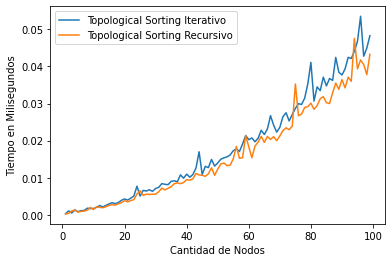

In [654]:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import numpy as np


x=[]; y=[]
ix=[]; iy=[]


for n in range(1,100):

  z = repeat(setup="from __main__ import funcionEspecial", stmt=f"funcionEspecial({n})", repeat=1, number=10)
  x.append(n)
  y.append(z)

  t = repeat(setup="from __main__ import funcionEspecial2", stmt=f"funcionEspecial2({n})", repeat=1, number=10)
  ix.append(n)
  iy.append(t)

plt.plot(x,y)
plt.plot(ix,iy)
plt.legend(["Topological Sorting Iterativo","Topological Sorting Recursivo"])

plt.xlabel('Cantidad de Nodos')
plt.ylabel('Tiempo en Milisegundos')
plt.show()

Como se puede apreciar, las dos variantes del algoritmo son muy parecidas entre si, tomando en cuanta de que se utiliza un generador de instancias para cada uno,. Esto tiene sentido ya que tanto la variante iterativa como la recursiva poseen misma complejidad temporal $O(V+E)$. 